In [11]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Total Headlines: 200
Positive Headlines: 35
Neutral Headlines: 134
Negative Headlines: 31

Sentiment Ratios:
Positive Ratio: 17.50%
Neutral Ratio: 67.00%
Negative Ratio: 15.50%


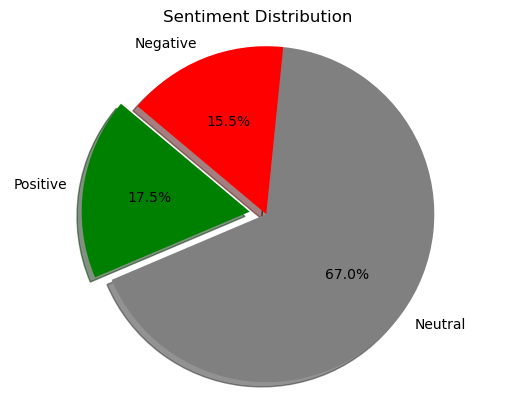

In [1]:
import requests
import feedparser
from textblob import TextBlob
import matplotlib.pyplot as plt

def get_news_headlines(feed_url, min_headlines=200):
    """
    Fetch headlines from an RSS feed.

    Parameters:
    - feed_url (str): URL of the RSS feed.
    - min_headlines (int): Minimum number of headlines to fetch.

    Returns:
    - headlines (list): List of headline strings.
    """
    response = requests.get(feed_url)
    
    if response.status_code == 200:
        feed = feedparser.parse(response.text)
        headlines = [entry.title for entry in feed.entries]
        
        # Ensure we have at least min_headlines
        while len(headlines) < min_headlines:
            # Fetch additional headlines until we reach the minimum required
            response = requests.get(feed_url)
            if response.status_code == 200:
                feed = feedparser.parse(response.text)
                additional_headlines = [entry.title for entry in feed.entries]
                headlines.extend(additional_headlines)
            else:
                print(f"Failed to fetch additional headlines. Status code: {response.status_code}")
                break
        
        return headlines[:min_headlines]  # Return at least min_headlines
    else:
        print(f"Failed to fetch headlines. Status code: {response.status_code}")
        return None

def analyze_sentiment(headline):
    """
    Analyze sentiment of a headline using TextBlob.

    Parameters:
    - headline (str): Headline string.

    Returns:
    - polarity (float): Sentiment polarity.
    """
    analysis = TextBlob(headline)
    return analysis.sentiment.polarity

def evaluate_sentiment(headlines):
    """
    Evaluate sentiment of a list of headlines and print results.

    Parameters:
    - headlines (list): List of headline strings.
    """
    positive_count = 0
    neutral_count = 0
    negative_count = 0

    for headline in headlines:
        sentiment = analyze_sentiment(headline)
        if sentiment > 0:
            positive_count += 1
        elif sentiment < 0:
            negative_count += 1
        else:
            neutral_count += 1

    total_headlines = len(headlines)

    print(f"Total Headlines: {total_headlines}")
    print(f"Positive Headlines: {positive_count}")
    print(f"Neutral Headlines: {neutral_count}")
    print(f"Negative Headlines: {negative_count}")

    # Calculate the overall sentiment ratio
    positive_ratio = positive_count / total_headlines
    neutral_ratio = neutral_count / total_headlines
    negative_ratio = negative_count / total_headlines

    print("\nSentiment Ratios:")
    print(f"Positive Ratio: {positive_ratio:.2%}")
    print(f"Neutral Ratio: {neutral_ratio:.2%}")
    print(f"Negative Ratio: {negative_ratio:.2%}")

    # Return sentiment ratios for visualization
    return positive_ratio, neutral_ratio, negative_ratio

def plot_sentiment_distribution(positive_ratio, neutral_ratio, negative_ratio):
    """
    Plot a pie chart visualizing sentiment distribution.

    Parameters:
    - positive_ratio (float): Ratio of positive sentiments.
    - neutral_ratio (float): Ratio of neutral sentiments.
    - negative_ratio (float): Ratio of negative sentiments.
    """
    labels = ['Positive', 'Neutral', 'Negative']
    sizes = [positive_ratio, neutral_ratio, negative_ratio]
    colors = ['green', 'gray', 'red']
    explode = (0.1, 0, 0)  # explode 1st slice

    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Sentiment Distribution')
    plt.show()

if __name__ == "__main__":
    # Define the RSS feed URL for BBC News
    bbc_url = "http://feeds.bbci.co.uk/news/rss.xml"

    # Fetch a minimum of 200 headlines from BBC News
    bbc_headlines = get_news_headlines(bbc_url, min_headlines=200)

    # Analyze and evaluate the sentiment of BBC headlines
    if bbc_headlines:
        positive_ratio, neutral_ratio, negative_ratio = evaluate_sentiment(bbc_headlines)

        # Plot sentiment distribution
        plot_sentiment_distribution(positive_ratio, neutral_ratio, negative_ratio)
